In [13]:
%matplotlib inline

In [14]:
import pandas as pd
import numpy as np
import scipy.constants
import copy

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.transforms as mtransforms
import matplotlib.gridspec as gridspec

import scipy
import scipy.stats as st
from matplotlib.lines import Line2D
from scipy.stats import norm

import random

from scipy.stats import shapiro


NUM_LIG = 1

In [16]:
'''READ THERMO DATA FROM LOG.LAMMPS'''

# Read specific columns from data file:
cols = {
    0: "Step",  
    1: "Temp",  
    2: "E_pair",  
    3: "E_mol",  
    4: "TotEng",  
    5: "Press"
}
data=pd.read_fwf('lig%d/log.lammps' % NUM_LIG, skiprows=229, skipfooter=31, usecols=cols.keys(), names=cols.values(), engine='python', dtype=float)


# Convert to dictionary of numpy arrays:
data = data.to_dict("series")
for key in data:
    data[key] = np.array(data[key].values)
    
thermo_data = data
#print(thermo_data)

In [18]:
'''READ COORDINATION NUMBER DATA FROM coords.DMP'''

# Read specific columns from data file:
cols = {
    0: "c_coord",  
}
toskip = []
for idx in range(10010):
    if (idx % 10) != 0:
        toskip.append(idx)
toskip = [i-1 for i in toskip]
#print(toskip)
# Pulls in the coord.dump file, coordination number
data=pd.read_csv('lig%d/coords.dmp' % NUM_LIG, sep = " ", skiprows=toskip, usecols=cols.keys(), names=cols.values(), engine='python')


# Read specific columns from data file:
cols = {
    0: "TIMESTEP",  
}
toskip = []
for idx in range(10010):
    if (idx % 10) != 2:
        toskip.append(idx)
toskip = [i-1 for i in toskip]
toskip = toskip[1:]
#print(toskip)
# Pulls in the coord.dump file, timestep
data2=pd.read_csv('lig%d/coords.dmp' % NUM_LIG, sep = " ", skiprows=toskip, usecols=cols.keys(), names=cols.values(), engine='python')



# Convert to dictionary of numpy arrays:
data = data.to_dict("series")
data2 = data2.to_dict("series")
for key in data:
    data[key] = np.array(data[key].values)
for key in data2:
    data2[key] = np.array(data2[key].values)

data2["TIMESTEP"] = np.delete(data2["TIMESTEP"], -1) # weird bug, hacky fix
data["timestep"] = data2["TIMESTEP"]

coord_data = data
#print(coord_data)

In [19]:
# Really weird bug with timestep for log.lammps, so

timestep = coord_data["timestep"]

thermo_data["Step"] = None

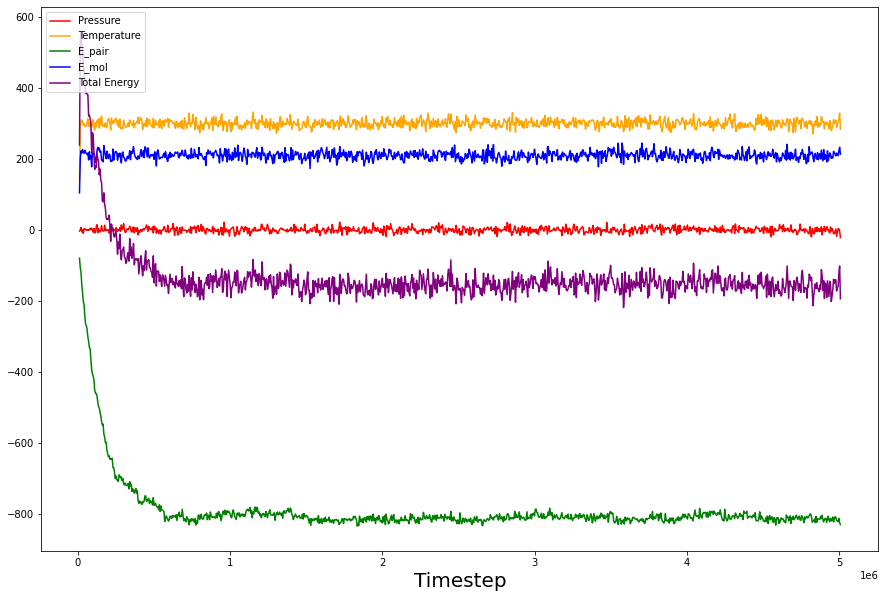

In [20]:
'''PLOT THERMO DATA'''

fig, ax = plt.subplots(figsize=[15, 10])
ax.plot(timestep, thermo_data["Press"], label="Pressure", color="red", linestyle="solid")
ax.plot(timestep, thermo_data["Temp"], label="Temperature", color="orange", linestyle="solid")
ax.plot(timestep, thermo_data["E_pair"], label="E_pair", color="green", linestyle="solid")
ax.plot(timestep, thermo_data["E_mol"], label="E_mol", color="blue", linestyle="solid")
ax.plot(timestep, thermo_data["TotEng"], label="Total Energy", color="purple", linestyle="solid")


#ax.fill_between(x1, [30 + upper_range] * len(x1), [30 + lower_range] * len(x1), color="purple", alpha=0.5, label="\'Good\' range")
ax.set_xlabel("Timestep", fontsize=20)
#ax.set_ylabel("", fontsize=20)
#ax.set_ylim(0, 52)
#ax.tick_params(axis='x', labelsize=14)
#ax.tick_params(axis='y', labelsize=14)

plt.legend(loc="upper left")
plt.savefig("figures/lig%d_thermo.png" % NUM_LIG, bbox_inches="tight")
plt.show()

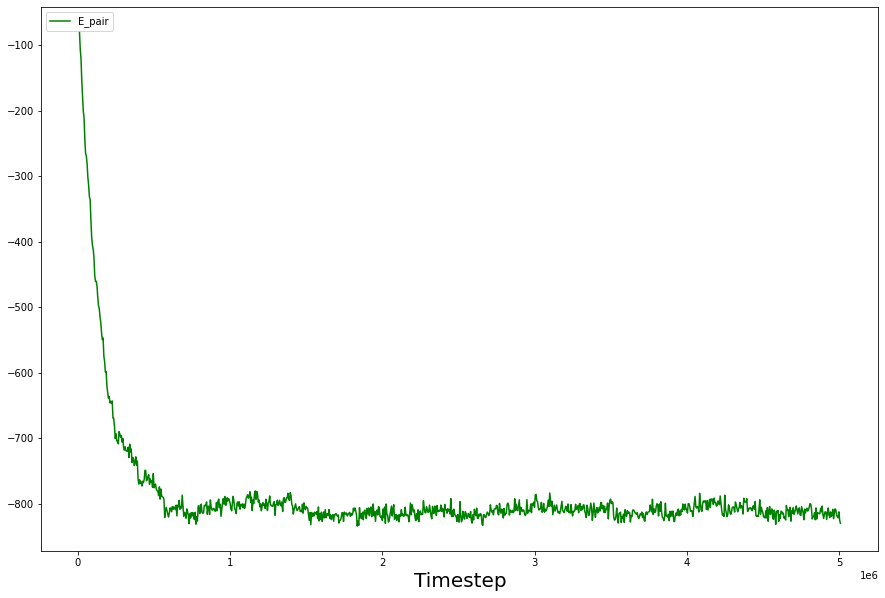

In [21]:
'''PLOT E_PAIR'''

fig, ax = plt.subplots(figsize=[15, 10])
ax.plot(timestep, thermo_data["E_pair"], label="E_pair", color="green", linestyle="solid")


#ax.fill_between(x1, [30 + upper_range] * len(x1), [30 + lower_range] * len(x1), color="purple", alpha=0.5, label="\'Good\' range")
ax.set_xlabel("Timestep", fontsize=20)
#ax.set_ylabel("", fontsize=20)
#ax.set_ylim(0, 52)
#ax.tick_params(axis='x', labelsize=14)
#ax.tick_params(axis='y', labelsize=14)

plt.legend(loc="upper left")
plt.savefig("figures/lig%d_epair.png" % NUM_LIG, bbox_inches="tight")
plt.show()

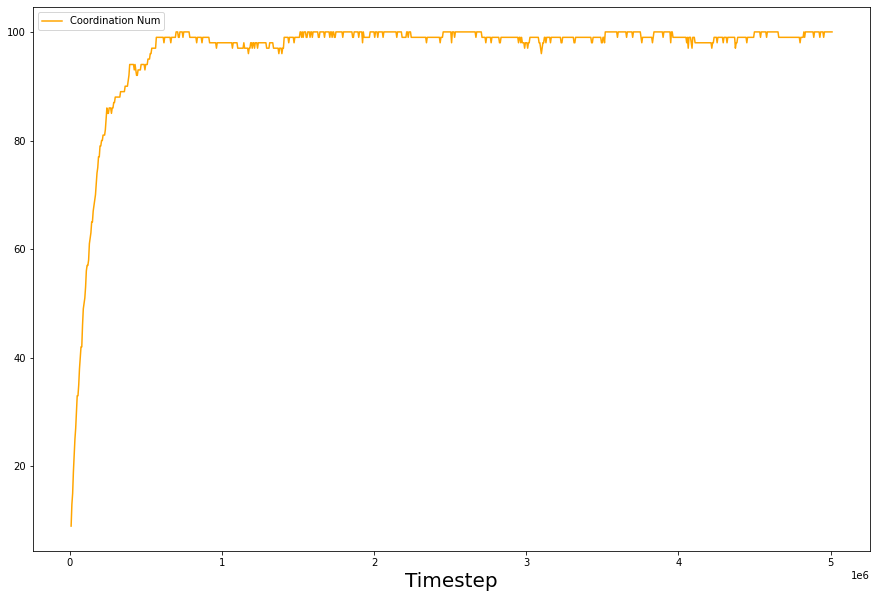

In [22]:
'''PLOT COORDINATION NUMBER'''

fig, ax = plt.subplots(figsize=[15, 10])
ax.plot(coord_data["timestep"], coord_data["c_coord"], label="Coordination Num", color="orange", linestyle="solid")


#ax.fill_between(x1, [30 + upper_range] * len(x1), [30 + lower_range] * len(x1), color="purple", alpha=0.5, label="\'Good\' range")
ax.set_xlabel("Timestep", fontsize=20)
#ax.set_ylabel("", fontsize=20)
#ax.set_ylim(0, 52)
#ax.tick_params(axis='x', labelsize=14)
#ax.tick_params(axis='y', labelsize=14)

plt.legend(loc="upper left")
plt.savefig("figures/lig%d_coord.png" % NUM_LIG, bbox_inches="tight")
plt.show()

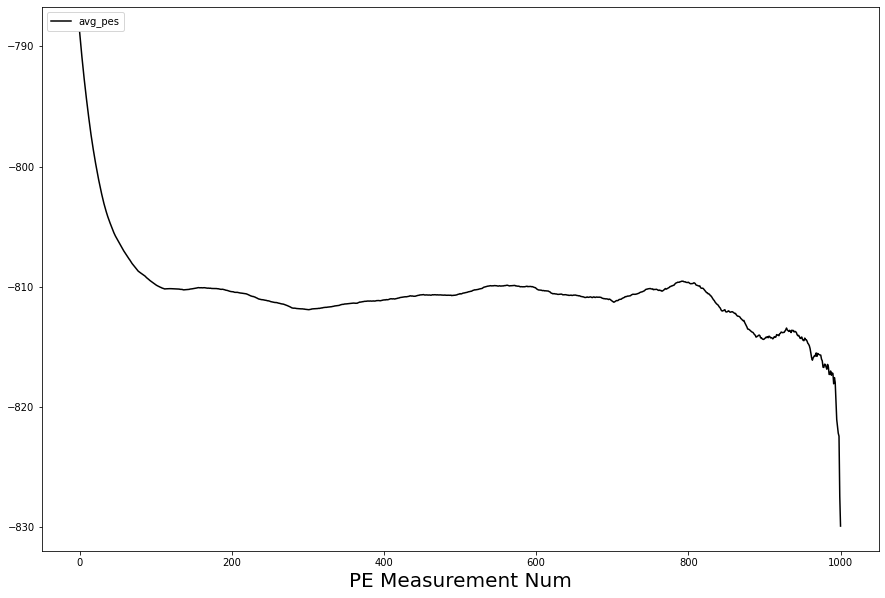

In [23]:
'''DETERMINING SECOND EQUILLIBRIUM POINT -- average to the end'''


pe = thermo_data["E_pair"]
pe_steps = [i for i in range(len(pe))]

avg_pes = []
for step in pe_steps:
    #print(pe_steps[:step])
    pe_eq = np.delete(pe, pe_steps[:step])
    avg_pe = np.average(pe_eq)
    avg_pes.append(avg_pe)

    

fig, ax = plt.subplots(figsize=[15, 10])
ax.plot(pe_steps, avg_pes, label="avg_pes", color="black", linestyle="solid")


#ax.fill_between(x1, [30 + upper_range] * len(x1), [30 + lower_range] * len(x1), color="purple", alpha=0.5, label="\'Good\' range")
ax.set_xlabel("PE Measurement Num", fontsize=20)
#ax.set_ylabel("", fontsize=20)
#ax.set_ylim(0, 52)
#ax.tick_params(axis='x', labelsize=14)
#ax.tick_params(axis='y', labelsize=14)

plt.legend(loc="upper left")
plt.savefig("figures/lig%d_PEavg.png" % NUM_LIG, bbox_inches="tight")
plt.show()



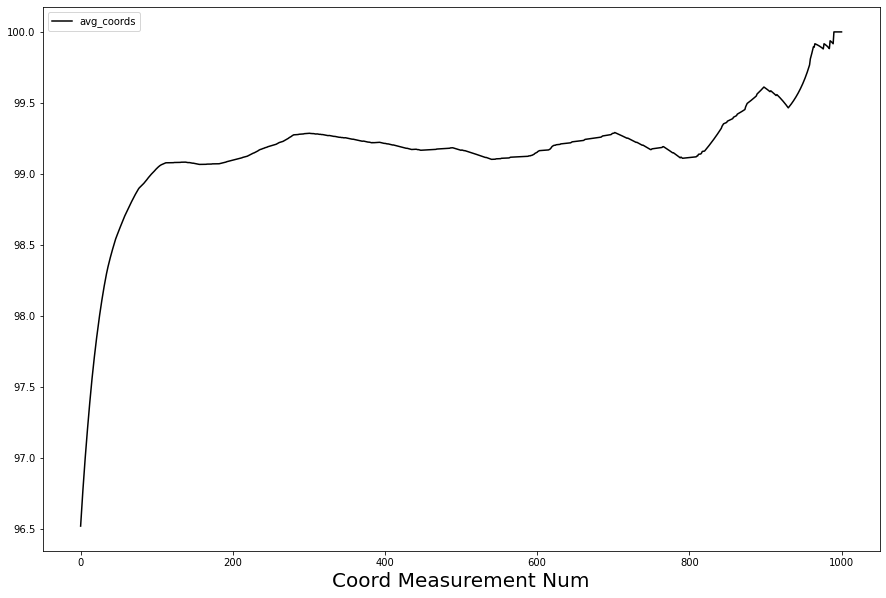

In [24]:
# just to check, the average of coord in analogy to above

coord = coord_data["c_coord"]
coord_steps = [i for i in range(len(coord))]

avg_coords = []
for step in coord_steps:
    #print(pe_steps[:step])
    coord_eq = np.delete(coord, coord_steps[:step])
    avg_coord = np.average(coord_eq)
    avg_coords.append(avg_coord)

fig, ax = plt.subplots(figsize=[15, 10])
ax.plot(coord_steps, avg_coords, label="avg_coords", color="black", linestyle="solid")


#ax.fill_between(x1, [30 + upper_range] * len(x1), [30 + lower_range] * len(x1), color="purple", alpha=0.5, label="\'Good\' range")
ax.set_xlabel("Coord Measurement Num", fontsize=20)
#ax.set_ylabel("", fontsize=20)
#ax.set_ylim(0, 52)
#ax.tick_params(axis='x', labelsize=14)
#ax.tick_params(axis='y', labelsize=14)

plt.legend(loc="upper left")
plt.savefig("figures/lig%d_coordavg.png" % NUM_LIG, bbox_inches="tight")
plt.show()



In [25]:
'''COPY AND PASTED CODE TO FIND INTERCEPTS'''

from __future__ import division 
import numpy as np
import matplotlib.pyplot as plt


def find_intercepts(x, y1, y2):
    def interpolated_intercepts(x, y1, y2):
        """Find the intercepts of two curves, given by the same x data"""

        def intercept(point1, point2, point3, point4):
            """find the intersection between two lines
            the first line is defined by the line between point1 and point2
            the first line is defined by the line between point3 and point4
            each point is an (x,y) tuple.

            So, for example, you can find the intersection between
            intercept((0,0), (1,1), (0,1), (1,0)) = (0.5, 0.5)

            Returns: the intercept, in (x,y) format
            """    

            def line(p1, p2):
                A = (p1[1] - p2[1])
                B = (p2[0] - p1[0])
                C = (p1[0]*p2[1] - p2[0]*p1[1])
                return A, B, -C

            def intersection(L1, L2):
                D  = L1[0] * L2[1] - L1[1] * L2[0]
                Dx = L1[2] * L2[1] - L1[1] * L2[2]
                Dy = L1[0] * L2[2] - L1[2] * L2[0]

                x = Dx / D
                y = Dy / D
                return x,y

            L1 = line([point1[0],point1[1]], [point2[0],point2[1]])
            L2 = line([point3[0],point3[1]], [point4[0],point4[1]])

            R = intersection(L1, L2)

            return R

        idxs = np.argwhere(np.diff(np.sign(y1 - y2)) != 0)

        xcs = []
        ycs = []

        for idx in idxs:
            xc, yc = intercept((x[idx], y1[idx]),((x[idx+1], y1[idx+1])), ((x[idx], y2[idx])), ((x[idx+1], y2[idx+1])))
            xcs.append(xc)
            ycs.append(yc)
        return np.array(xcs), np.array(ycs)


    #plt.plot(x, y1, marker='o', mec='none', ms=4, lw=1, label='y1')
    #plt.plot(x, y2, marker='o', mec='none', ms=4, lw=1, label='y2')

    idx = np.argwhere(np.diff(np.sign(y1 - y2)) != 0)

    #plt.plot(x[idx], y1[idx], 'ms', ms=7, label='Nearest data-point method')

    # new method!
    xcs, ycs = interpolated_intercepts(x,y1,y2)
    #for xc, yc in zip(xcs, ycs):
        #plt.plot(xc, yc, 'co', ms=5, label='Nearest data-point, with linear interpolation')

    return xcs, ycs
    #plt.legend(frameon=False, fontsize=10, numpoints=1, loc='lower left')

    #plt.savefig('curve crossing.png', dpi=200)
    #plt.show()


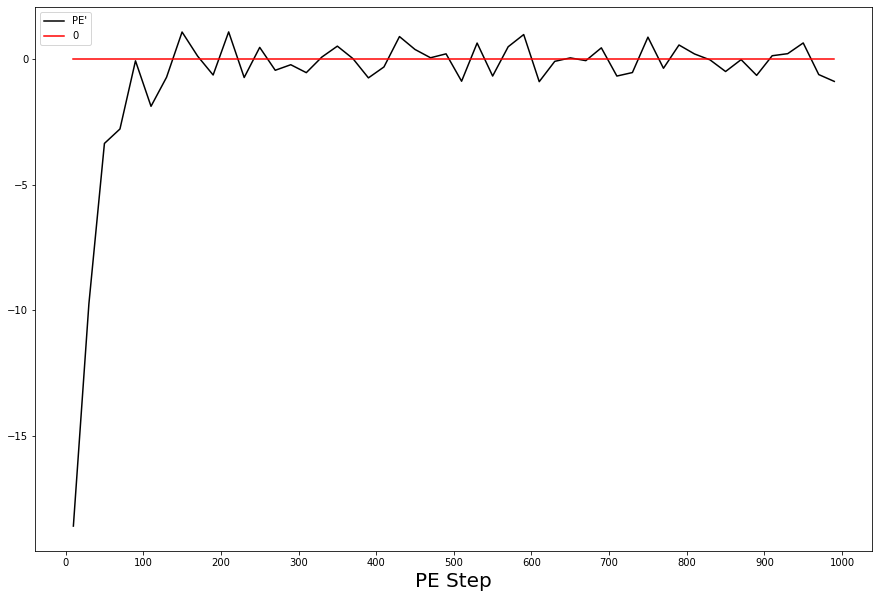

[[138.03790447]
 [173.16297525]
 [197.387126  ]
 [221.92002116]
 [242.22957306]
 [260.22298268]
 [327.42301566]
 [370.53746022]
 [415.17985731]
 [493.83300574]
 [521.60108686]
 [539.71975724]
 [561.57579576]
 [600.4170409 ]
 [643.05443212]
 [658.74714181]
 [672.42120655]
 [697.97235922]
 [737.60697214]
 [764.09263994]
 [777.89288834]
 [827.30861105]
 [906.58559858]
 [960.20044179]]


In [34]:
'''DETERMINING SECOND EQUILLIBRIUM POINT -- fat derivatives'''


def num_derivative(x_list, y_list):
    y_prime = np.diff(y_list)/np.diff(x_list)
    x_prime = []
    for i in range(len(y_prime)):
        temp = (x_list[i+1] + x_list[i])/2
        x_prime = np.append(x_prime, temp)
    return x_prime, y_prime


# Initial xlist and ylist: full versions of PE vs. steps
pe = thermo_data["E_pair"]
pe_steps = [i for i in range(len(pe))]

# Reduce both xlist and ylist, i.e. each step is now [fatness] wide instead of one step
fatness = 20
fat_pe = []
fat_pe_steps = []
for idx, step in enumerate(pe_steps):
    if idx % fatness == 0:
        fat_pe_steps.append(step)
        fat_pe.append(pe[idx])
#         print(idx)
#         print(step)
#         print(pe[idx])
#         print(pe_steps[idx])

x_prime, y_prime = num_derivative(fat_pe_steps, fat_pe)


fig, ax = plt.subplots(figsize=[15, 10])
ax.plot(x_prime, y_prime, label="PE'", color="black", linestyle="solid")
ax.plot(x_prime, [0]*len(y_prime), label="0", color="red", linestyle="solid")



#ax.fill_between(x1, [30 + upper_range] * len(x1), [30 + lower_range] * len(x1), color="purple", alpha=0.5, label="\'Good\' range")
ax.set_xlabel("PE Step", fontsize=20)
#ax.set_ylabel("", fontsize=20)
#ax.set_ylim(0, 52)
#ax.tick_params(axis='x', labelsize=14)
#ax.tick_params(axis='y', labelsize=14)

# To specify the number of ticks on both or any single axes
plt.locator_params(axis='y', nbins=6)
plt.locator_params(axis='x', nbins=20)
plt.legend(loc="upper left")
plt.savefig("figures/figure1.png", bbox_inches="tight")
plt.show()

# to find intersection, for now may be easiest to use gnuplot
import csv
with open('data/PE_deriv_lig%d.dat' % NUM_LIG, 'w') as f:
    writer = csv.writer(f, delimiter=' ')
    writer.writerows(zip(x_prime,y_prime))
    
# numerical intersections
x  = x_prime
y1 = y_prime
y2 = np.array([0]*len(y_prime))

xcs, _ = find_intercepts(x, y1, y2)

print(xcs)

In [44]:
'''FIND AVG COORDINATION NUM AFTER 2ND EQ POINT'''
pe = thermo_data["E_pair"]
coord = coord_data["c_coord"]
eq2_point = 327
eq2_time = timestep[eq2_point]
print("approx eq2 point is")
print(eq2_time)

pe_steps = [i for i in range(len(pe))]
assert len(pe) == len(coord)

pe_eq = np.delete(pe, pe_steps[:eq2_point])
avg_pe = np.average(pe_eq)
print("Average PE: " + str(avg_pe))

coord_eq = np.delete(coord, pe_steps[:eq2_point])
avg_coord = np.average(coord_eq)
print("Average Coordination Number: " + str(avg_coord))

approx eq2 point is
1645000
Average PE: -811.6947555192877
Average Coordination Number: 99.2700296735905


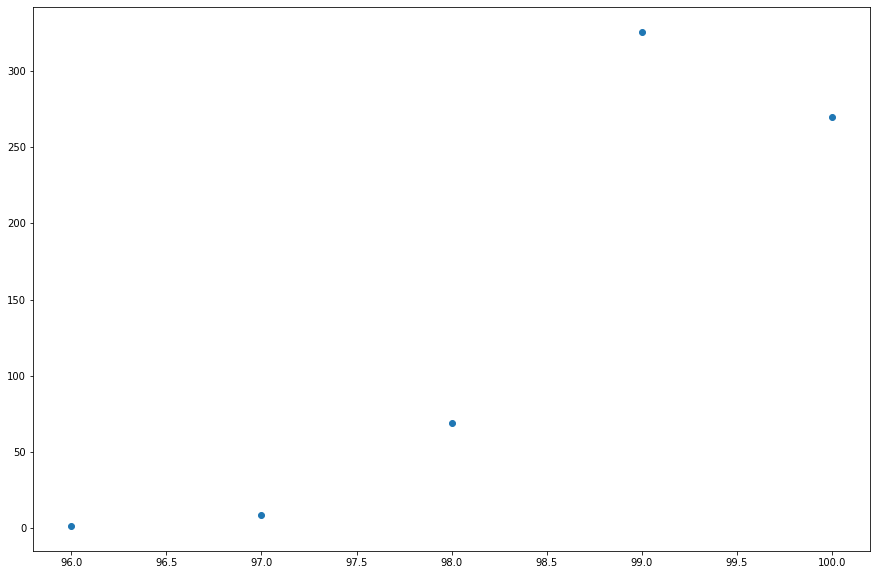

stat=0.785, p=0.000

the average coordination number is 99.2700296735905 with the 1-sigma interval being (99.0,100.0)
distribution 
[100 100 100 100 100 100  99 100 100 100 100 100 100  99 100 100  99 100
 100  99  99 100 100 100 100 100 100 100 100 100  99 100 100 100 100 100
 100 100 100 100 100 100 100  99  99 100 100 100 100 100 100  99 100 100
 100 100  98 100  99  99  99  99  99  99  99  99 100 100 100 100 100 100
  99 100 100 100  99 100 100 100 100 100 100  99 100 100 100 100 100 100
 100 100 100 100 100 100 100 100 100 100 100  99 100 100 100 100 100 100
  99  99  99  99  99  99 100 100  99 100 100 100  99  99  99  99  99  99
  99  99  99  99  99  99  99  99  99  99  99  99  99  99  98  99  99  99
  99  99  99  99  99  99  99  99  99  99  99  99  99  99  98  99  99  99
 100 100 100 100 100 100 100 100 100 100 100  98 100 100 100  99 100 100
 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100
 100 100 100 100 100 100 100  99 100 100 100 100 100 100 100  99 

In [45]:
# Uncertainties

#Test Normality of the distribution of coordination number after equilibrium


x_range = np.linspace(min(coord_eq), max(coord_eq), num= max(coord_eq) - min(coord_eq) +1)
counts = []
for x in x_range:
    count = 0
    for num in coord_eq:
        if num == x:
            count += 1
    counts.append(count)


fig, ax = plt.subplots(figsize=[15, 10])
ax.scatter(x_range, counts)
plt.show()

stat, p = shapiro(coord_eq)
print('stat=%.3f, p=%.3f\n' % (stat, p))


p1, p2 = np.percentile(coord_eq,(15.9, 84.1))



print("the average coordination number is " + str(avg_coord) + " with the 1-sigma interval being (" + str(p1) + "," + str(p2) +")")

print("distribution ")
print(coord_eq)


std = np.std(coord_eq, ddof=1)

print("std=" + str(std))